In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,5.0,1,What amazing service! Apple won't even talk to...
1,6.0,1,iPhone software update fucked up my phone big ...
2,11.0,1,hey #apple when you make a new ipod dont make ...
3,12.0,1,Ha! Not heavy machinery but it does what I nee...
4,13.0,1,Contemplating giving in to the iPhone bandwago...



### remove duplicate and null valune

In [4]:
data.shape

(8000, 3)

In [5]:
data.duplicated().sum()

26

In [6]:
data.isnull().sum()

id       80
label     0
tweet     0
dtype: int64

In [7]:
# text preprocessing


In [28]:
import re
import string


### convert to uppercase and lowercase

In [29]:
data["tweet"] = data["tweet"].apply(lambda x: "   ".join(x.lower() for x in x.split()))

In [30]:
data["tweet"].head(5)


0    what   amazing   service!   apple   won't   ev...
1    iphone   software   update   fucked   up   my ...
2    hey   #apple   when   you   make   a   new   i...
3    ha!   not   heavy   machinery   but   it   doe...
4    contemplating   giving   in   to   the   iphon...
Name: tweet, dtype: object

### Remove links

In [31]:


import re

data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'https?://\S+', '', word) for word in x.split()))



In [32]:
data["tweet"].head(5)

0    what amazing service! apple won't even talk to...
1    iphone software update fucked up my phone big ...
2    hey #apple when you make a new ipod dont make ...
3    ha! not heavy machinery but it does what i nee...
4    contemplating giving in to the iphone bandwago...
Name: tweet, dtype: object

### Remove puncuvation

In [33]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:


def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)



In [35]:
data["tweet"].head(5)

0    what amazing service apple wont even talk to m...
1    iphone software update fucked up my phone big ...
2    hey apple when you make a new ipod dont make i...
3    ha not heavy machinery but it does what i need...
4    contemplating giving in to the iphone bandwago...
Name: tweet, dtype: object

In [36]:



data["tweet"].tail(10)

7990    im amazed by how effective this product is its...
7991    ive been using this product for months now and...
7992    this product has become a musthave for me i ca...
7993    im so glad i took a chance on this product its...
7994    this product has simplified my cooking routine...
7995    ive recommended this product to all my friends...
7996    ive tried countless products in the past but n...
7997    this product has made such a noticeable differ...
7998    im amazed by how well this product works zero ...
7999    ive been using this product for years now and ...
Name: tweet, dtype: object

### Remove Numbers

In [37]:

data["tweet"] = data['tweet'].str.replace(r'\d+', '', regex=True)


In [38]:
data["tweet"].tail(10)

7990    im amazed by how effective this product is its...
7991    ive been using this product for months now and...
7992    this product has become a musthave for me i ca...
7993    im so glad i took a chance on this product its...
7994    this product has simplified my cooking routine...
7995    ive recommended this product to all my friends...
7996    ive tried countless products in the past but n...
7997    this product has made such a noticeable differ...
7998    im amazed by how well this product works zero ...
7999    ive been using this product for years now and ...
Name: tweet, dtype: object

### Downloads Stopwords

In [39]:
import nltk

In [40]:
nltk.download('stopwords',download_dir='../static/model/')

[nltk_data] Downloading package stopwords to ../static/model/...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:

with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [42]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
data["tweet"].head()

0    what amazing service apple wont even talk to m...
1    iphone software update fucked up my phone big ...
2    hey apple when you make a new ipod dont make i...
3    ha not heavy machinery but it does what i need...
4    contemplating giving in to the iphone bandwago...
Name: tweet, dtype: object

### Remove stopwords


In [44]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [45]:
data["tweet"].head(5)

0    amazing service apple wont even talk question ...
1    iphone software update fucked phone big time s...
2    hey apple make new ipod dont make new color in...
3    ha heavy machinery need apple really dropped b...
4    contemplating giving iphone bandwagon simply c...
Name: tweet, dtype: object

In [46]:

data

,id,label,tweet
0,5.0,1,amazing service apple wont even talk question ...
1,6.0,1,iphone software update fucked phone big time s...
2,11.0,1,hey apple make new ipod dont make new color in...
3,12.0,1,ha heavy machinery need apple really dropped b...
4,13.0,1,contemplating giving iphone bandwagon simply c...
...,...,...,...
7995,NaN,0,ive recommended product friends theyve impressed
7996,NaN,0,ive tried countless products past none worked ...
7997,NaN,0,product made noticeable difference life couldn...
7998,NaN,0,im amazed well product works zero complaints


In [47]:

data["tweet"].tail(5)

7995     ive recommended product friends theyve impressed
7996    ive tried countless products past none worked ...
7997    product made noticeable difference life couldn...
7998         im amazed well product works zero complaints
7999                    ive using product years never let
Name: tweet, dtype: object

### Stemming

In [48]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [49]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [50]:
data["tweet"].head()

0    amaz servic appl wont even talk question unles...
1    iphon softwar updat fuck phone big time stupid...
2    hey appl make new ipod dont make new color inc...
3    ha heavi machineri need appl realli drop ball ...
4    contempl give iphon bandwagon simpli cellcom n...
Name: tweet, dtype: object

In [51]:
data

,id,label,tweet
0,5.0,1,amaz servic appl wont even talk question unles...
1,6.0,1,iphon softwar updat fuck phone big time stupid...
2,11.0,1,hey appl make new ipod dont make new color inc...
3,12.0,1,ha heavi machineri need appl realli drop ball ...
4,13.0,1,contempl give iphon bandwagon simpli cellcom n...
...,...,...,...
7995,NaN,0,ive recommend product friend theyv impress
7996,NaN,0,ive tri countless product past none work well one
7997,NaN,0,product made notic differ life couldnt happier
7998,NaN,0,im amaz well product work zero complaint


### Bulding vacabulary


In [52]:


from collections import Counter
vocab = Counter()


In [53]:

vocab

Counter()

In [54]:
for sentence in data['tweet']:
 vocab.update(sentence.split())

In [55]:
len (vocab)

15921

In [56]:
data.shape

(8000, 3)

In [57]:
tokens = [key for key in vocab if vocab[key] > 10]

In [58]:
len(tokens)

1157

In [60]:
def save_vocabulary(lines , filename):
    data = '\n'.join(lines)
    file = open(filename, 'w' , encoding ="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide dataset

In [61]:
x = data ['tweet']
y = data ['label']

In [62]:
x


0       amaz servic appl wont even talk question unles...
1       iphon softwar updat fuck phone big time stupid...
2       hey appl make new ipod dont make new color inc...
3       ha heavi machineri need appl realli drop ball ...
4       contempl give iphon bandwagon simpli cellcom n...
                              ...                        
7995           ive recommend product friend theyv impress
7996    ive tri countless product past none work well one
7997       product made notic differ life couldnt happier
7998             im amaz well product work zero complaint
7999                       ive use product year never let
Name: tweet, Length: 8000, dtype: object

In [63]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7995    0
7996    0
7997    0
7998    0
7999    0
Name: label, Length: 8000, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test =train_test_split(x,y, test_size=0.2) 

In [65]:
x_train.shape

(6400,)

In [66]:
x_test.shape

(1600,)

In [67]:
y_train

2927    0
2857    0
345     1
3275    0
4434    0
       ..
330     1
1801    1
1069    1
728     1
2713    0
Name: label, Length: 6400, dtype: int64

In [68]:
x_test

4255       new toy bring trip tmr samsung galaxynot phone
5596    hannib buress join ‘spiderman… news photograph...
1312     yay new appl updat brick ipod woo hoo thank appl
2971    new phone arriv coupl day excit appl iphones i...
1591    nokia lumia back order long whenll get phone c...
                              ...                        
5838    new phone yay thank awesom folk best buy flint...
872     phone wouldnt turn past like hour gave heart a...
1789    iphon want receiv text toanycameatonc iphonepr...
1872    unbeliev terribl iphon less hour alreadi froze...
7371    march nd recent buy earli birthday present ps ...
Name: tweet, Length: 1600, dtype: object

### vectorization

In [69]:


def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
               
        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    return vectorized_lst_new


In [70]:

vecterized_x_train = vectorizer(x_train, tokens)

In [71]:
vecterized_x_test = vectorizer(x_test, tokens)

In [72]:
vecterized_x_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [73]:
y_train

2927    0
2857    0
345     1
3275    0
4434    0
       ..
330     1
1801    1
1069    1
728     1
2713    0
Name: label, Length: 6400, dtype: int64

In [74]:
vecterized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [75]:

y_test

4255    0
5596    0
1312    1
2971    0
1591    1
       ..
5838    0
872     1
1789    1
1872    1
7371    0
Name: label, Length: 1600, dtype: int64

In [76]:
y_train.value_counts()

label
0    4764
1    1636
Name: count, dtype: int64

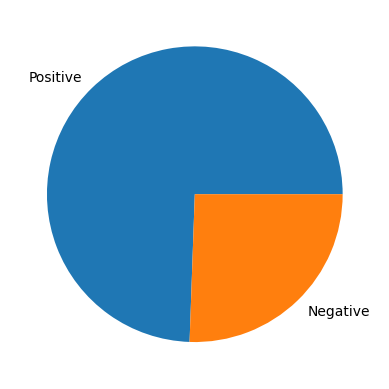

In [77]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive' ,'Negative'])
plt.show()

### handle in blance datasets

In [78]:
!pip install imbalanced_learn

Defaulting to user installation because normal site-packages is not writeable


In [79]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vecterized_x_train_smote, y_train_smote = smote.fit_resample(vecterized_x_train ,y_train)

print(vecterized_x_train_smote.shape, y_train_smote.shape)

(9528, 1157) (9528,)


In [80]:
y_train_smote.value_counts()

label
0    4764
1    4764
Name: count, dtype: int64

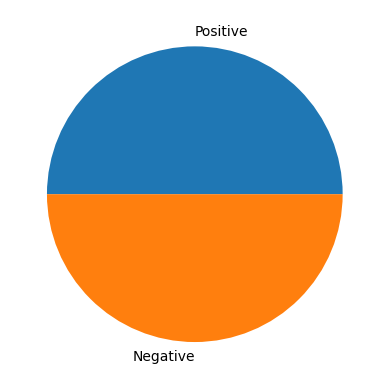

In [81]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive' ,'Negative'])
plt.show()

In [82]:
vecterized_x_train_smote

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [83]:
y_train_smote

0       0
1       0
2       1
3       0
4       0
       ..
9523    1
9524    1
9525    1
9526    1
9527    1
Name: label, Length: 9528, dtype: int64

In [84]:
vecterized_x_test



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [85]:
y_test

4255    0
5596    0
1312    1
2971    0
1591    1
       ..
5838    0
872     1
1789    1
1872    1
7371    0
Name: label, Length: 1600, dtype: int64

### Model Traing

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [87]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

def training_score(y_act, y_pred):
    acc = round(accuracy_score(y_act ,y_pred), 3)
    pr = round(precision_score(y_act ,y_pred), 3)
    rec = round (recall_score(y_act ,y_pred), 3)
    f1 = round(f1_score(y_act ,y_pred), 3)
    print(f'Training Score:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall ={rec}\n\tF1-Score ={f1}')
    
def validation_score(y_act, y_pred):
    acc = round(accuracy_score(y_act ,y_pred), 3)
    pr = round(precision_score(y_act ,y_pred), 3)
    rec = round (recall_score(y_act ,y_pred), 3)
    f1 = round(f1_score(y_act ,y_pred), 3)
    print(f'Testing Score:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall ={rec}\n\tF1-Score ={f1}')


### Logistic regression

In [88]:
lr = LogisticRegression()

lr.fit(vecterized_x_train_smote ,y_train_smote )

y_train_pred = lr.predict( vecterized_x_train_smote)

y_test_pred = lr.predict(vecterized_x_test)

training_score(y_train_smote , y_train_pred)

validation_score(y_test ,y_test_pred)


Training Score:
	Accuracy = 0.939
	Precision = 0.914
	Recall =0.969
	F1-Score =0.94
Testing Score:
	Accuracy = 0.884
	Precision = 0.717
	Recall =0.869
	F1-Score =0.786


### Naive Bayes

In [89]:
mnb = MultinomialNB()

mnb.fit(vecterized_x_train_smote ,y_train_smote )

y_train_pred = mnb.predict( vecterized_x_train_smote)

y_test_pred = mnb.predict(vecterized_x_test)

training_score(y_train_smote , y_train_pred)

validation_score(y_test ,y_test_pred)

Training Score:
	Accuracy = 0.903
	Precision = 0.863
	Recall =0.957
	F1-Score =0.908
Testing Score:
	Accuracy = 0.868
	Precision = 0.664
	Recall =0.931
	F1-Score =0.775


### Desicion Tree

In [90]:
dt = DecisionTreeClassifier()

dt.fit(vecterized_x_train_smote ,y_train_smote )

y_train_pred = dt.predict( vecterized_x_train_smote)

y_test_pred = dt.predict(vecterized_x_test)

training_score(y_train_smote , y_train_pred)

validation_score(y_test ,y_test_pred)

Training Score:
	Accuracy = 1.0
	Precision = 1.0
	Recall =1.0
	F1-Score =1.0
Testing Score:
	Accuracy = 0.839
	Precision = 0.679
	Recall =0.646
	F1-Score =0.662


### Random Forest

In [91]:
rf = RandomForestClassifier()

rf.fit(vecterized_x_train_smote ,y_train_smote)

y_train_pred = rf.predict(vecterized_x_train_smote)

y_test_pred = rf.predict(vecterized_x_test)

training_score(y_train_smote , y_train_pred)

validation_score(y_test ,y_test_pred)

Training Score:
	Accuracy = 1.0
	Precision = 1.0
	Recall =1.0
	F1-Score =1.0
Testing Score:
	Accuracy = 0.873
	Precision = 0.756
	Recall =0.708
	F1-Score =0.731


### Support vector mechine

In [92]:
svm = SVC()

svm.fit(vecterized_x_train_smote ,y_train_smote)

y_train_pred = svm.predict(vecterized_x_train_smote)

y_test_pred = svm.predict(vecterized_x_test)

training_score(y_train_smote , y_train_pred)

validation_score(y_test ,y_test_pred)

Training Score:
	Accuracy = 0.978
	Precision = 0.962
	Recall =0.995
	F1-Score =0.978
Testing Score:
	Accuracy = 0.892
	Precision = 0.752
	Recall =0.831
	F1-Score =0.789


### Save Modle

In [93]:
import pickle
with open('../static/model/model.pickle' ,'wb') as file:
    pickle.dump(svm ,file)